In [24]:
# import library
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims


In [25]:
"""
เป็นการแสดงพารามิเตอร์โครงสร้างของโมเดล VGG16
"""

# โหลด VGG16 Model 
model = VGG16()
# สรุปรวมโครงสร้างและจำนวนพารามิเตอร์ของโมเดล VGG16
model.summary()
# ดึง array ของ weight และ bias ของ VGG16 ใน Layer 1
kernels, biases = model.layers[1].get_weights()
# ดึงโครงสร้างการทำงานทั้งหมดของ VGG16 Model ใน Layer 1 มาแสดง
model.layers[1].get_config()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Preprocess Image')

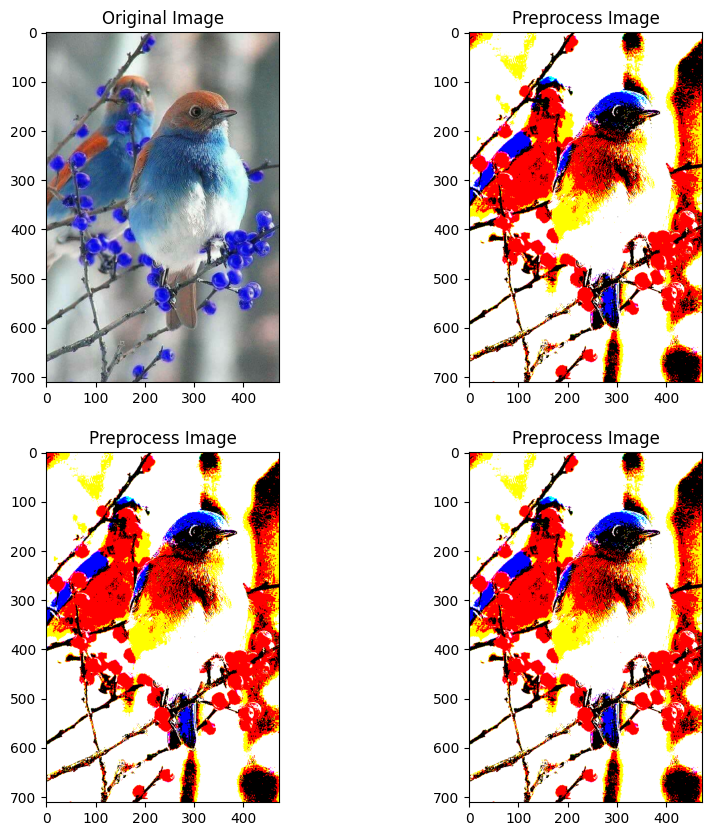

In [26]:
# อ่านไฟล์ภาพที่ต้องการนำเข้า Model 
img = cv2.imread("bird.jpg")
img_ori = img

# ปรับโครงสร้าง Image Array จาก 3D to 4D
# แปลงรูปภาพให้อยู่ในรูปแบบ Array
img = img_to_array(img)

"""
expand_dims เป็นฟังก์ชันที่ใช้ในการเพิ่มมิติเข้าไปในอาร์เรย์ และมีพารามิเตอร์สำคัญสองตัวคืออาร์เรย์
ที่ต้องการเพิ่มมิติ (ในที่นี้คือ img) และแกนที่ต้องการเพิ่มมิติเข้าไป (ในที่นี้คือ axis=0 ซึ่งหมายถึงเพิ่มมิติที่ 0)
ดังนั้นผลลัพธ์ของคำสั่งนี้คือ img จะกลายเป็นอาร์เรย์ 4 มิติที่มีขนาด (1, H, W, Ch) ซึ่งเป็นรูปแบบที่เหมาะ
สำหรับการนำเข้ารูปภาพเข้าสู่โมเดล CNN เพื่อทำการประมวลผลและคำนวณผลลัพธ์ในแต่ละตัวอย่างของรูปภาพ
"""
img = expand_dims(img, axis=0)

"""
preprocess_input คือฟังก์ชันที่ทำการปรับปรุงภาพที่กำลังจะนำเข้าให้เหมาะสมกับโมเดล VGG16 หรือโมเดล 
CNN อื่น ๆ โดยจะทำการปรับค่าสีและการปรับปรุงค่าอื่น ๆ ของภาพ
"""
img = preprocess_input(img)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# แสดงภาพ Original
axes[0,0].imshow(img_ori)
axes[0,0].set_title('Original Image')

# แสดงภาพหลังทำ preprocess
axes[0,1].imshow(img[0])
axes[0,1].set_title('Preprocess Image')
# แสดงภาพหลังทำ preprocess
axes[1,0].imshow(img[0])
axes[1,0].set_title('Preprocess Image')
# แสดงภาพหลังทำ preprocess
axes[1,1].imshow(img[0])
axes[1,1].set_title('Preprocess Image')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 413ms/step


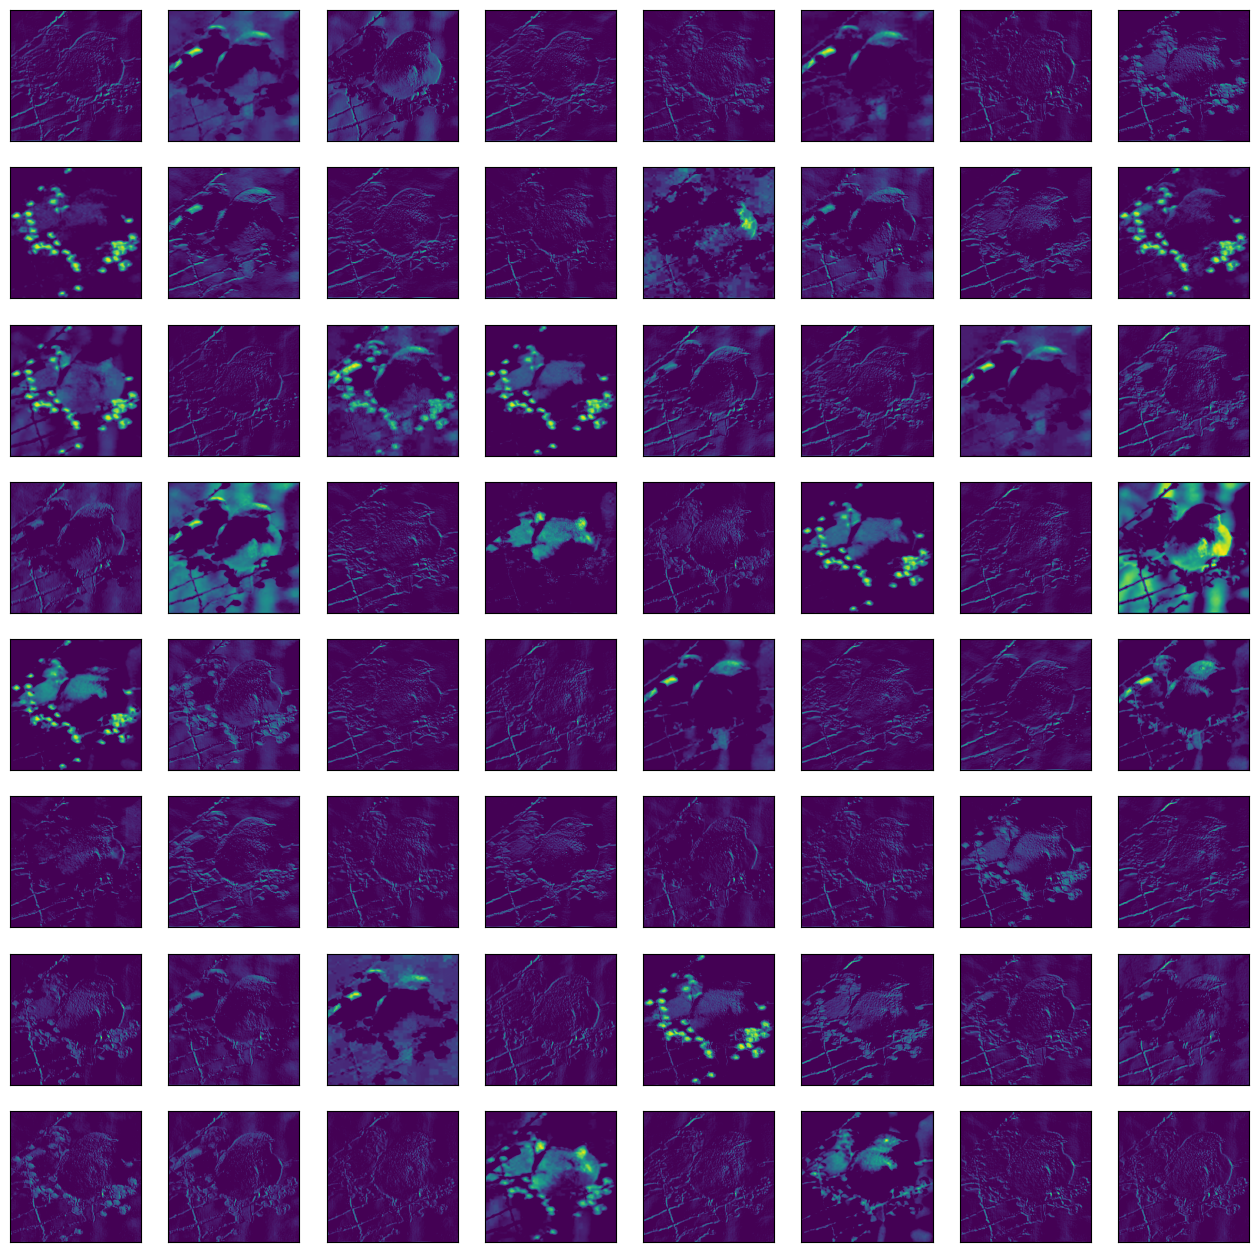

In [8]:

f = plt.figure(figsize=(16,16))

model = VGG16()

# ดึงโมเดล VGG16 เฉพาะ CNN Layer 1 มาใข้
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# โหลด Image โดยเอาขนาดตามที่เราต้องการคือ 244x244
img = load_img(f'bird.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

# ดึง Feature map ของ CNN Layer 1 มา โดยทำ model prediction
feature_maps = model.predict(img)

# แสดงภาพ Feature map ผลลัพธ์จาก 64 node ของ CNN Layer 1 แสดงเป็น 8x8
square = 8
ix = 1
for _ in range(square): 
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1

plt.show()